# imports and config

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import os
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import seaborn as sn

sn.set(font_scale=1.4)

In [2]:
IMAGE_SIZE = (150, 150)

class_names = ["mountain", "street", "glacier", "buildings", "sea", "forest"]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

print(f"class_names_label: {class_names_label}")

class_names_label: {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


# loading the data

In [3]:
def load_data():
    DIRECTORY = "dataset"
    CATEGORIES = ["train", "test"]
    output = []

    for category in CATEGORIES:
        print(f"Loading {category} images...")
        path = os.path.join(DIRECTORY, category)
        images = []
        labels = []

        for folder in os.listdir(path):
            print(f"Loading {folder} images")
            label = class_names_label[folder]

            for file in os.listdir(os.path.join(path, folder)):
                image_path = os.path.join(path, folder, file)

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                images.append(image)
                labels.append(label)

        images = np.array(images, dtype="float32")
        labels = np.array(labels, dtype="int32")

        output.append((images, labels))
        print(f"{category.capitalize()} images loaded.")

    print("Done")
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Loading train images...
Loading buildings images
Loading forest images
Loading glacier images
Loading mountain images
Loading sea images
Loading street images
Train images loaded.
Loading test images...
Loading buildings images
Loading forest images
Loading glacier images
Loading mountain images
Loading sea images
Loading street images
Test images loaded.
Done


In [5]:
# show some images from the dataset
fig = plt.figure(figsize=(100, 100))
fig.suptitle("Some examples of images of the dataset", fontsize=96)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].astype(np.uint8))
    plt.xlabel(class_names[train_labels[i]], fontsize=96)
plt.show()

# the model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=IMAGE_SIZE+(3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(train_images, train_labels, epochs=4, batch_size=128, validation_split=0.2)

Epoch 1/4
88/88 [==============================] - 68s 770ms/step - loss: 47.9947 - accuracy: 0.3276 - val_loss: 1.3947 - val_accuracy: 0.4638
Epoch 2/4
88/88 [==============================] - 67s 762ms/step - loss: 1.1330 - accuracy: 0.5975 - val_loss: 1.3612 - val_accuracy: 0.4777
Epoch 3/4
88/88 [==============================] - 74s 837ms/step - loss: 0.6828 - accuracy: 0.7654 - val_loss: 1.3650 - val_accuracy: 0.5444
Epoch 4/4
88/88 [==============================] - 67s 758ms/step - loss: 0.4007 - accuracy: 0.8662 - val_loss: 1.5136 - val_accuracy: 0.5451


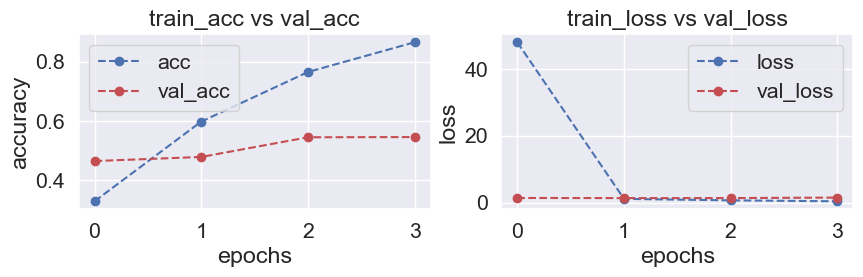

In [9]:
# plot the accuracy and the loss during the training
fig = plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.plot(history.history["accuracy"], "bo--", label="acc")
plt.plot(history.history["val_accuracy"], "ro--", label="val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history["loss"], "bo--", label="loss")
plt.plot(history.history["val_loss"], "ro--", label="val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

plt.show()

In [10]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 4s 41ms/step - loss: 1.5447 - accuracy: 0.5380


In [11]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred_labels))

94/94 [==============================] - 4s 41ms/step
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       525
           1       0.59      0.70      0.64       501
           2       0.43      0.39      0.41       553
           3       0.53      0.56      0.55       437
           4       0.42      0.43      0.43       510
           5       0.79      0.76      0.78       474

    accuracy                           0.54      3000
   macro avg       0.54      0.54      0.54      3000
weighted avg       0.54      0.54      0.53      3000

